## Sales price prediction


### 1) Problem statement
- To predict the sales of the different stores of Big Mart according to the provided dataset.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data
- The train data consists of 12 column and 8523 rows.
- The test data consist of 11 columns (excluding output) and 5681 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/Train.csv')
df_test = pd.read_csv('data/Test.csv')

In [3]:
df.shape, df_test.shape

((8523, 12), (5681, 11))

#### Show Top 5 Records

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### 2.2 Dataset information

- Item_Identifier: Unique product ID
- Item_Weight: Weight of product 
- Item_Fat_Content: Whether the product is low fat or not 
- Item_Visibility: The % of total display area of all products in a store allocated to the particular product 
- Item_Type: The category to which the product belongs 
- Item_MRP: Maximum Retail Price (list price) of the product
- Outlet_Identifier: Unique store ID 
- Outlet_Establishment_Year: The year in which store was established 
- Outlet_Size: The size of the store in terms of ground area covered 
- Outlet_Location_Type: The type of city in which the store is located 
- Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket 
- Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Observations
- There are missing values in Item_Weight and Outlet_Size
- Missing value in Item_Outlet_sales is ignored becase it is from test data.
- Replaced missing values with mode of the particular column.

In [6]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [7]:
df['Item_Weight'].mode()[0]

12.15

In [8]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mode()[0])

In [9]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [10]:
df['Outlet_Size']= df['Outlet_Size'].fillna('Medium')

In [11]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### 3.2 Check Duplicates

In [12]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [13]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### 3.4 Checking the number of unique values of each column

In [14]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

### 3.5 Check statistics of data set

In [15]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.736176,0.066132,140.992782,1997.831867,2181.288914
std,4.234540,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.150000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Observation
- From the above statistical data there are some outliers.

### 3.7 Exploring Data

In [16]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

We have 7 categorical features : ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [18]:
for feature in categorical_features:
    print(f'unique values in "{feature}" column: ', df[feature].unique())
    print()

unique values in "Item_Identifier" column:  ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

unique values in "Item_Fat_Content" column:  ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

unique values in "Item_Type" column:  ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

unique values in "Outlet_Identifier" column:  ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

unique values in "Outlet_Size" column:  ['Medium' 'High' 'Small']

unique values in "Outlet_Location_Type" column:  ['Tier 1' 'Tier 3' 'Tier 2']

unique values in "Outlet_Type" column:  ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']



#### Observations
- In Item_Fat_Content 'LF', 'low fat' and 'reg' have to be replaced with 'Low Fat' and 'Regular'

In [19]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(to_replace=['LF', 'reg', 'low fat'], value=['Low Fat', 'Regular', 'Low Fat'])

In [20]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [21]:
df.drop(columns=['Item_Identifier'], axis=1, inplace=True)

In [22]:
df.head()z

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


### saving the train dataset after cleaning and replacing null values

In [24]:
df.to_csv('data/Train_clean.csv')

### 4. Exploring Data ( Visualization )

#### 4.1 Box plot to find the outliers in the numerical data

In [25]:
COLOR_PALETTE = ['#E6FFFD', '#F6FA70', '#AEE2FF', '#ACBCFF', '#B799FF', '#B6EAFA', '#FCFFB2', '#FFD3A3', '#FF55BB']

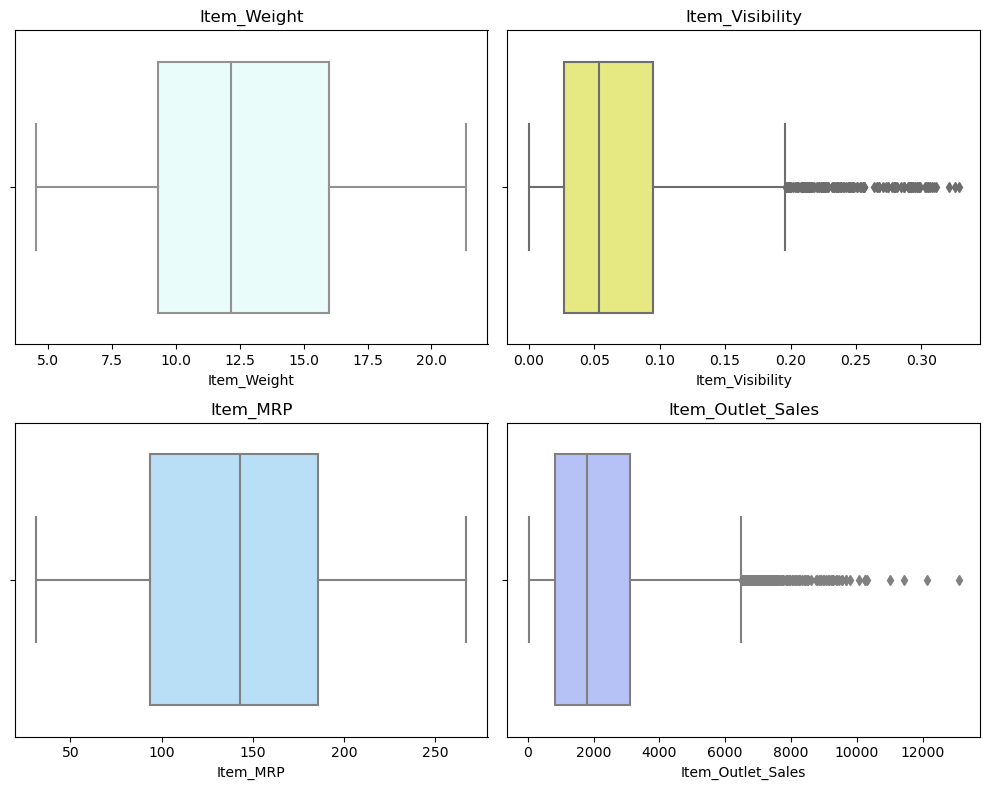

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

columns=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
for i, col in enumerate(columns):
    sns.boxplot(x=df[col], ax=axes[i], color=COLOR_PALETTE[i])
    
    axes[i].set_title(f"{col}")
plt.tight_layout()
plt.show()

#### Observation
- Item Visibility has outlier so we have to remove the values above 0.20
- Item Outlet sales also has outliers so we have to remove the values above 6200
- To find out the feature which affect most outliers in item outlet sales

In [27]:
df.loc[df['Item_Visibility']>0.20].reset_index()

,index,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,49,12.15,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
1,83,12.15,Low Fat,0.293418,Household,194.6136,OUT019,1985,Small,Tier 1,Grocery Store,583.2408
2,108,12.15,Low Fat,0.278974,Soft Drinks,225.3720,OUT019,1985,Small,Tier 1,Grocery Store,679.1160
3,174,17.70,Low Fat,0.291865,Fruits and Vegetables,115.1834,OUT010,1998,Medium,Tier 3,Grocery Store,345.5502
4,334,12.15,Low Fat,0.204700,Frozen Foods,76.8670,OUT019,1985,Small,Tier 1,Grocery Store,229.7010
...,...,...,...,...,...,...,...,...,...,...,...,...
129,8292,12.15,Regular,0.209163,Fruits and Vegetables,179.1976,OUT019,1985,Small,Tier 1,Grocery Store,543.2928
130,8345,12.15,Regular,0.266397,Frozen Foods,215.6218,OUT019,1985,Small,Tier 1,Grocery Store,641.1654
131,8371,8.27,Regular,0.214125,Soft Drinks,183.9924,OUT010,1998,Medium,Tier 3,Grocery Store,185.0924
132,8432,14.00,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,Medium,Tier 3,Grocery Store,159.7920


#### Observation 
- The test dataset size is 8543 and the no of outliers is 134.
- We can safely remove the rows 

In [28]:
df.drop(df[df['Item_Visibility']>0.20].index, inplace=True)
df.drop(df[df['Item_Outlet_Sales']>6100].index, inplace=True)

#### 4.2

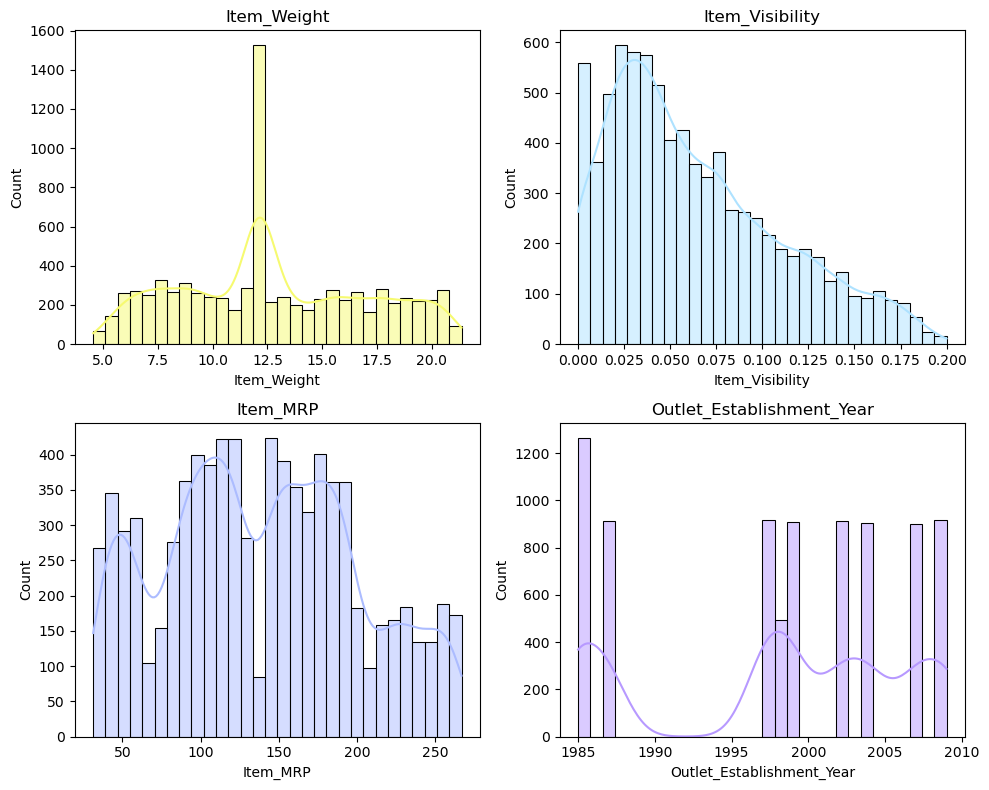

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

columns=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
for i, col in enumerate(columns):
    sns.histplot(x=df[col], bins=30, kde=True, ax=axes[i], color=COLOR_PALETTE[i+1])
    axes[i].set_title(f"{col}")
plt.tight_layout()
plt.show()

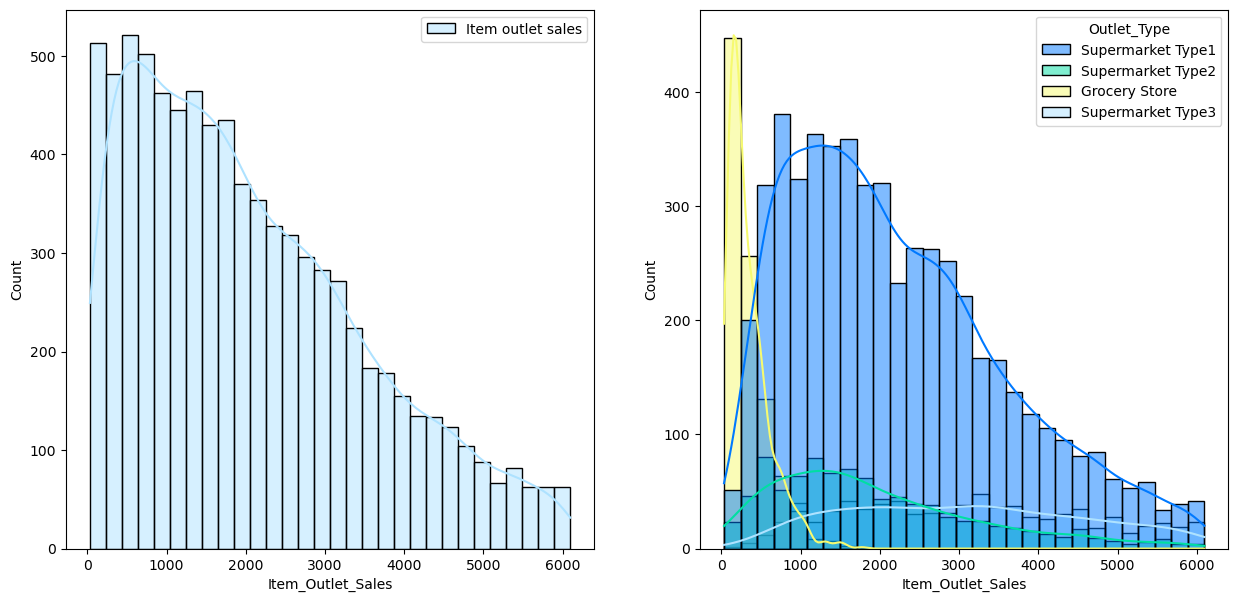

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Item_Outlet_Sales',bins=30,kde=True,color=COLOR_PALETTE[2],label='Item outlet sales')
plt.legend()
plt.subplot(122)
sns.histplot(data=df,x='Item_Outlet_Sales',kde=True,hue='Outlet_Type', palette=('#0079FF', '#00DFA2', '#F6FA70', '#AEE2FF'))
plt.show()

#####  Insights
- Supermarket Type1 has more normal distributed curve.

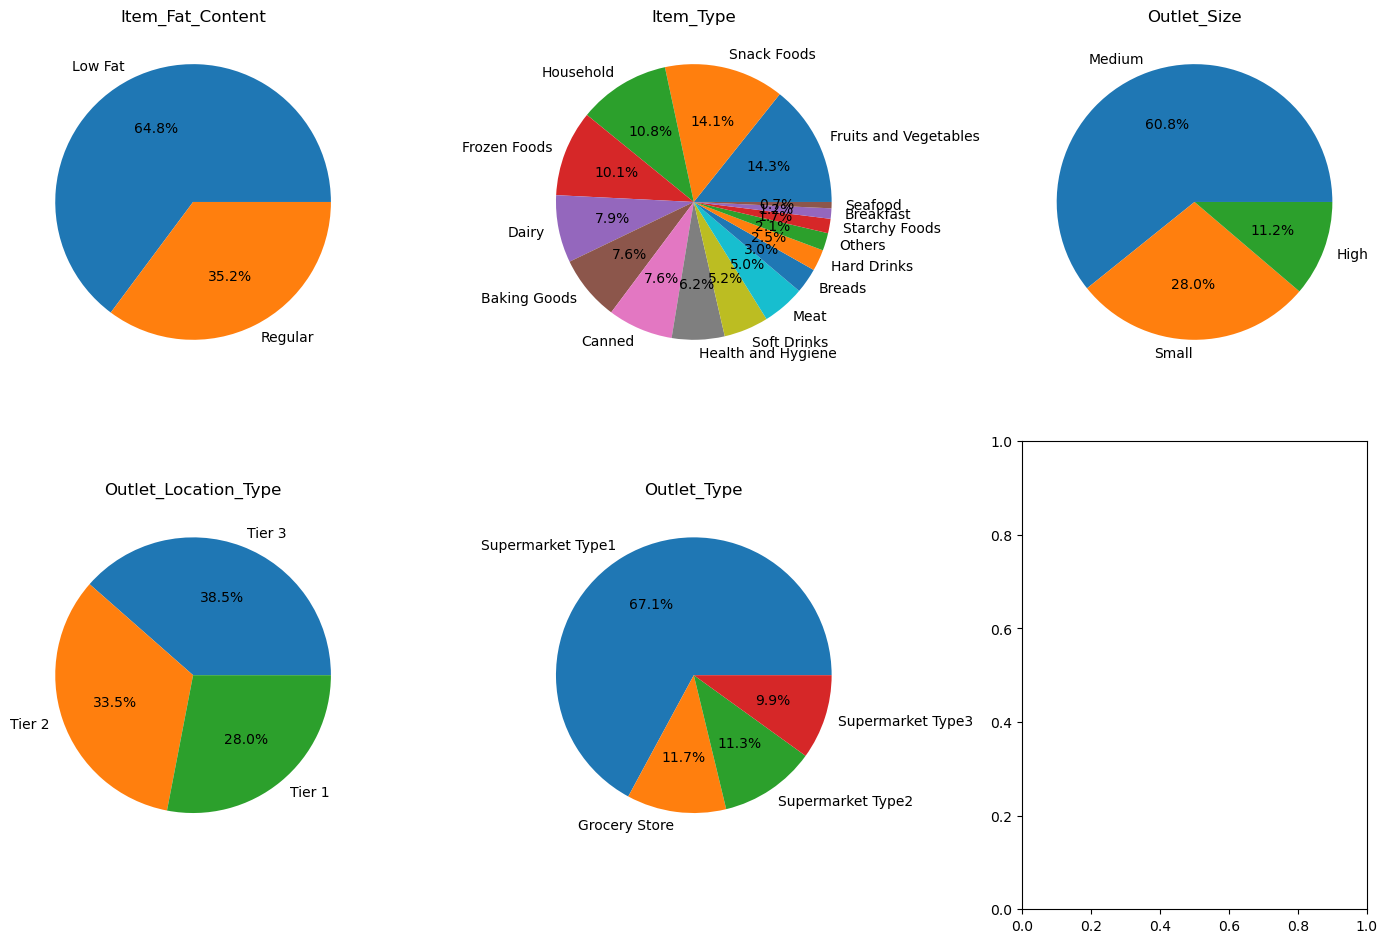

In [37]:
categorical_columns= ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))
for i, col in enumerate(categorical_columns):
    row_index = i // 3
    col_index = i % 3
    pie_data= df[col].value_counts()
    axes[row_index, col_index].pie(pie_data, labels=pie_data.index, autopct="%1.1f%%")
    axes[row_index, col_index].set_title(col)
plt.tight_layout()
plt.show()

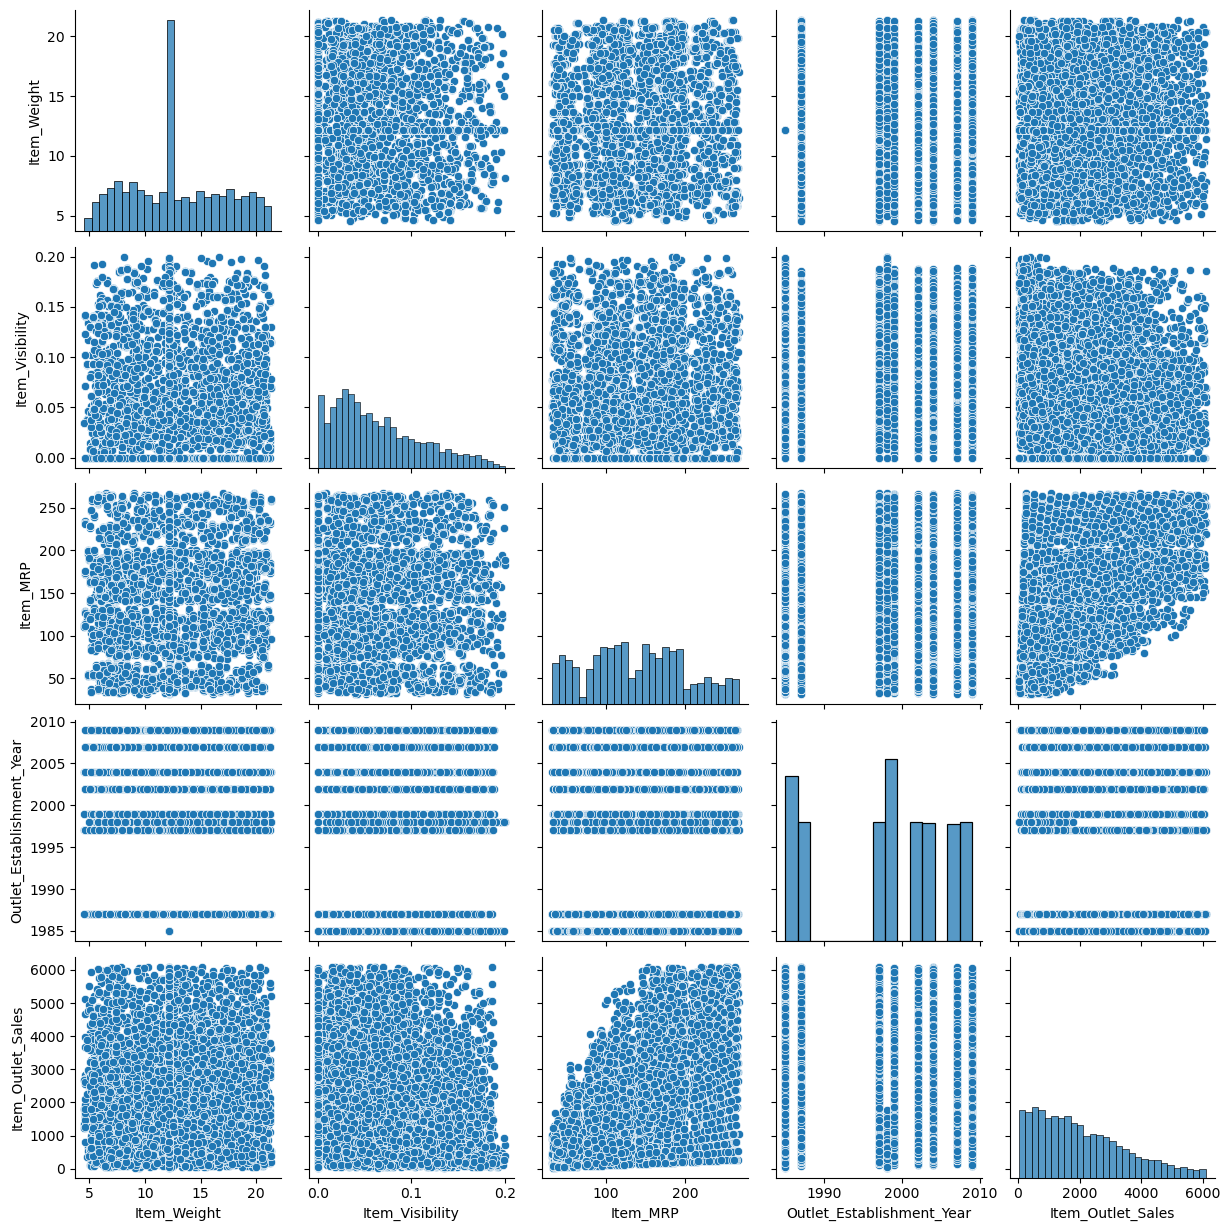

In [82]:
sns.pairplot(df)

<Axes: xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

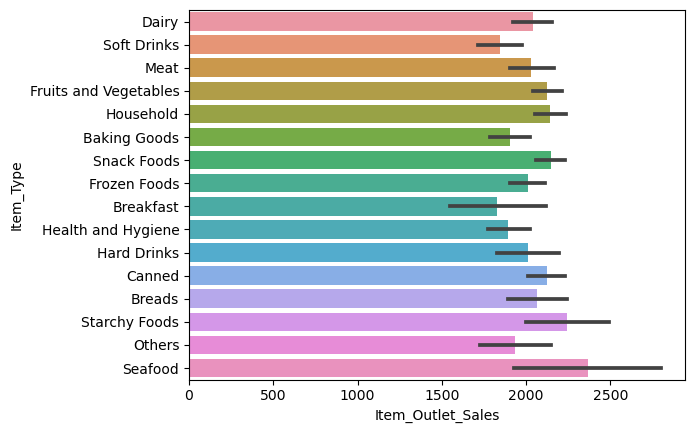

In [83]:
sns.barplot(y='Item_Type', x='Item_Outlet_Sales', data=df, orient='h')

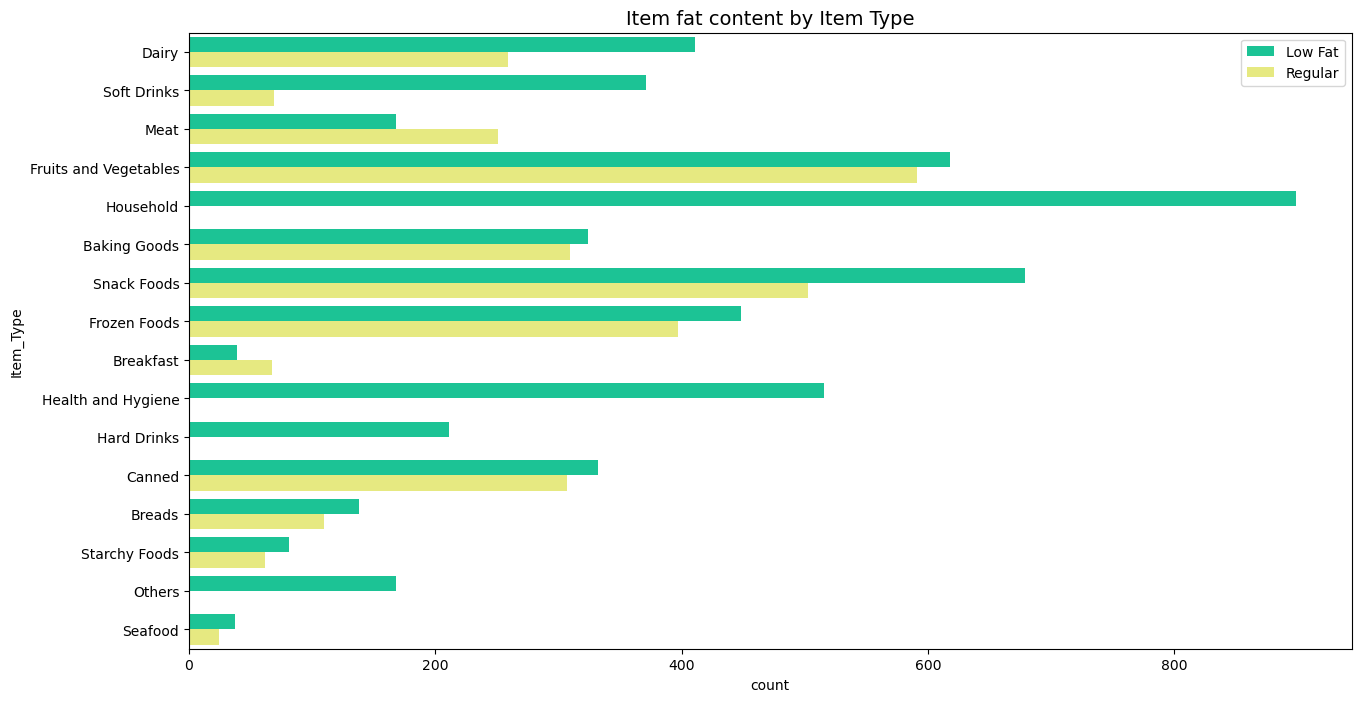

In [65]:
color_palette2 = ('#00DFA2', '#F6FA70')
plt.figure(figsize=(15, 8))
plt.title('Item fat content by Item Type', fontdict={'fontsize':14})

sns.countplot(data=df, y='Item_Type', hue='Item_Fat_Content', palette=color_palette2, orient='h')
plt.legend(loc='best')
plt.show()

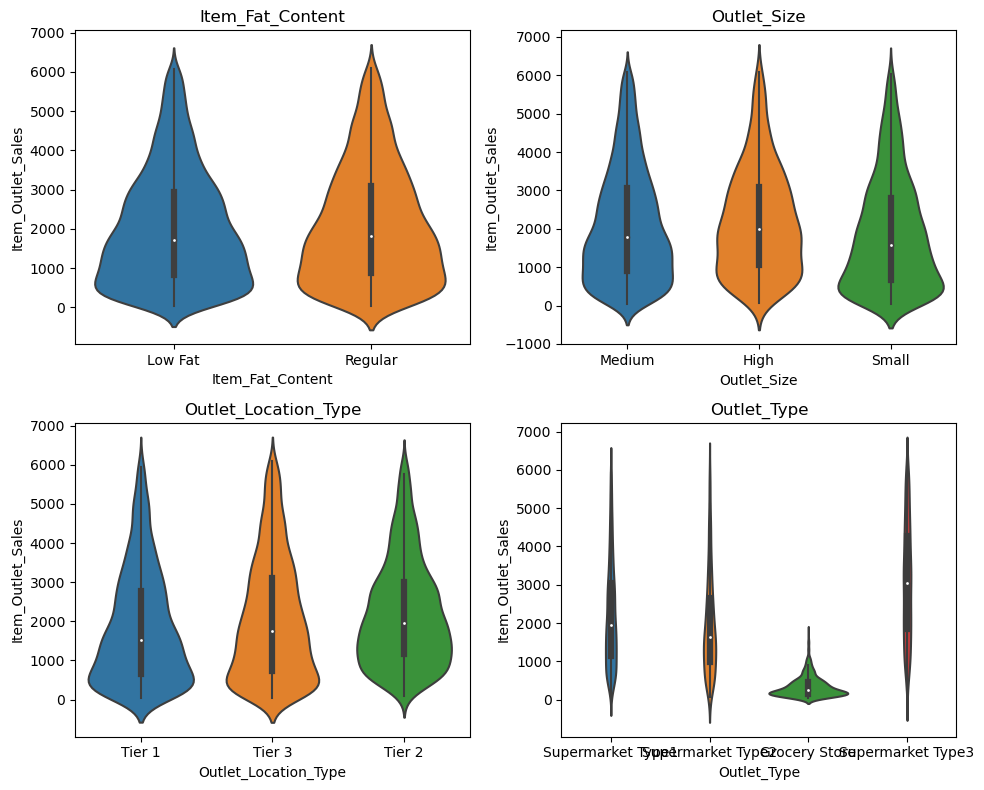

In [88]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for i, col in enumerate(columns):
    sns.violinplot(x=col, y='Item_Outlet_Sales', data=df, ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_ylabel("Item_Outlet_Sales")
plt.tight_layout()
plt.show()

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

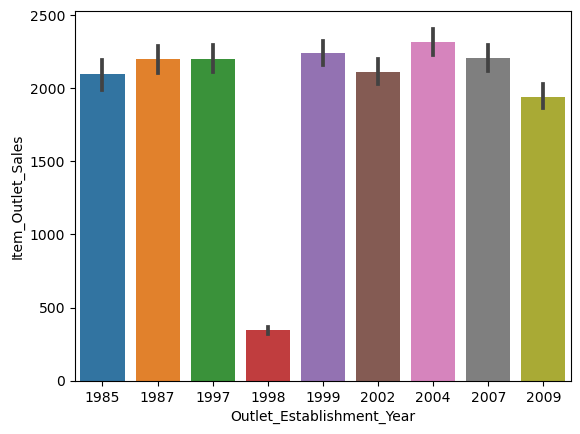

In [38]:
sns.barplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=df)